In [81]:
import pytesseract
from PIL import Image, ImageDraw, ImageFont
import os
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [82]:
file_path = r'C:\Users\User\Desktop\out'
folders = [x for x in os.listdir(file_path)]
img_path = os.path.join(file_path, folders[0])

In [83]:
imgs = os.listdir(img_path)
imgs

['가능 즐겁다 너머 최선 기타_1.jpg',
 '결혼 연세 전개되다 찌다 싸움_0.jpg',
 '곁 호주 꾸미다 너무 산부인과_0.jpg',
 '무료 겪다 유학 짙다 천_0.jpg',
 '범죄 동기 어린이 이내 여유_1.jpg',
 '빠뜨리다 어느새 쥐 인사 김치찌개_0.jpg',
 '예감 채소 외제 직장 영향력_3.jpg',
 '이같이 눈썹 보조 논하다 회전_3.jpg',
 '조금 이상하다 벗다 워낙 별다르다_1.jpg',
 '짐작 계산 성질 책임지다 스타_2.jpg',
 '홍보 유행 딱 그래 생활용품_0.jpg']

In [84]:
os.path.join(file_path, imgs[0])

'C:\\Users\\User\\Desktop\\out\\가능 즐겁다 너머 최선 기타_1.jpg'

In [85]:
# 이미지 열기
# img = os.path.join(file_path, imgs[0])
# img = 'C:/Users/User/Desktop/out/blur/그거 조카 요구되다 알루미늄 물론_0.jpg'
img = 'C:/Users/User/Desktop/명함/명함.jpg'
target = Image.open(img)

# 이미지에서 한국어 텍스트 추출하기
text = pytesseract.image_to_string(target, config=tessdata_dir_config, lang='kor+eng')
text


'팀장 | 디자인팀\n이자인\n\nCHEE 02-1234-5678\n휴대 010-1234-5678\n메일 somedesgin@naver.com\n\n(주) 썸디자인 연구소 | www.somd.co.kr\n서울특별시 성동구 성수동1가 MSS BF 612호\n\n'

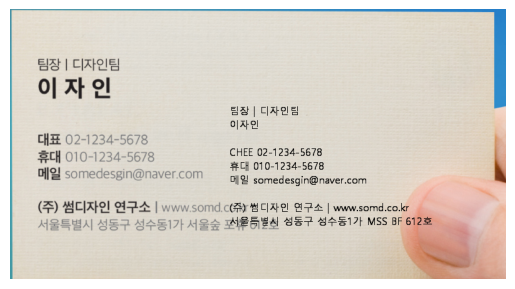

In [89]:
# 이미지에 텍스트 쓰기
draw = ImageDraw.Draw(target)
font = ImageFont.truetype('C:\Windows\Fonts\malgun.ttf', size=16) # 원하는 폰트와 크기 설정
draw.text((350, 150), text, font=font, fill='black')

# 이미지와 텍스트 출력하기
plt.axis('off')
plt.imshow(target)

In [87]:
text.split('\n')

['팀장 | 디자인팀',
 '이자인',
 '',
 'CHEE 02-1234-5678',
 '휴대 010-1234-5678',
 '메일 somedesgin@naver.com',
 '',
 '(주) 썸디자인 연구소 | www.somd.co.kr',
 '서울특별시 성동구 성수동1가 MSS BF 612호',
 '',
 '']